In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Insurance Churn.csv", skiprows=0)
df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.01%,0.220784,1.816481,...,-0.162668,1.079562,2.770844,-0.397427,no,5.492487,NaN,7.627730,0,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.01%,1.192441,3.513950,...,1.252022,1.223852,3.703013,0.656651,no,3.346429,4.321172,10.505284,1,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8.00E-06,0.952323,0.782974,...,0.657292,-0.353469,3.997183,2.059615,no,4.456565,NaN,7.810979,0,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.01%,-0.520756,1.825586,...,2.066346,1.761266,2.933707,0.899392,no,4.100022,1.151085,9.178325,1,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.01%,-0.732739,2.151990,...,0.663113,-0.952377,2.922302,3.003595,yes,3.234033,2.074927,11.702664,0,92.925935


In [3]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True)
profile.to_file("Insurance_churn.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df.y.value_counts()

0    34197
1     5803
Name: y, dtype: int64

In [5]:
df_0 = df[df['y']==0]
df_1=df[df['y']==1]
df_0=df_0.sample(n=5803,random_state=123)

In [6]:
df_balanced = pd.concat([df_0,df_1],axis=0).sample(frac=1).reset_index().drop(['index'],axis=1)

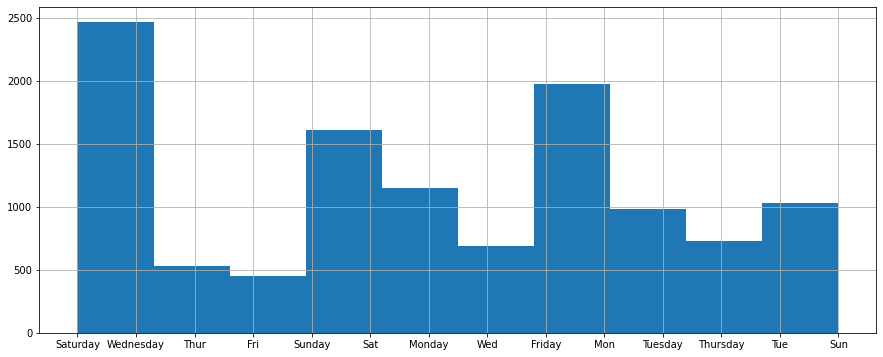

In [7]:
df_balanced.x3.hist(figsize=(15,6));

In [8]:
df_balanced = df_balanced.replace({'x3':{'Mon':'Monday','Tue':'Tuesday','Wed':'Wednesday','Thur':'Thursday','Fri':'Friday','Sat':'Saturday','Sun':'Sunday'}})
df_balanced.x3.unique()

array(['Saturday', 'Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

In [9]:
df_balanced.select_dtypes(include=['object']).head()

,x3,x7,x18,x23,x30,x32,x37,x54,x59,x67,x79
0,Saturday,-0.03%,"($1,010.20)",female,no,Missouri,5-10 miles,July,esurance,NaN,no
1,Wednesday,0.00%,($436.99),female,no,Florida,5-10 miles,July,allstate,toyota,no
2,Wednesday,0.01%,"$1,098.24",male,yes,Georgia,5-10 miles,December,progressive,NaN,no
3,Thursday,-0.01%,$867.67,male,no,California,5-10 miles,January,allstate,ford,no
4,Wednesday,0.01%,$42.26,female,no,Illinois,5-10 miles,December,progressive,mercedes,no


In [10]:
df_balanced.x37.unique()

array(['5-10 miles'], dtype=object)

In [11]:
df_balanced.drop(['x37'], axis=1, inplace=True)

In [12]:
df_balanced['x7'] = df_balanced['x7'].replace({'%': ''}, regex=True).astype(float)
df_balanced['x18'] = df_balanced['x19'].replace({'\$': ''}, regex=True).astype(float)

In [13]:
df_balanced[['x7','x18']].dtypes

x7     float64
x18    float64
dtype: object

In [14]:
df_convert_cat = df_balanced[['x53','x83']]

In [15]:
df_categorical = pd.concat([df_convert_cat,df_balanced.select_dtypes(include=['object'])],axis=1)
df_categorical.head()

,x53,x83,x3,x23,x30,x32,x54,x59,x67,x79
0,0,0,Saturday,female,no,Missouri,July,esurance,NaN,no
1,1,0,Wednesday,female,no,Florida,July,allstate,toyota,no
2,0,0,Wednesday,male,yes,Georgia,December,progressive,NaN,no
3,0,1,Thursday,male,no,California,January,allstate,ford,no
4,0,0,Wednesday,female,no,Illinois,December,progressive,mercedes,no


In [16]:
df_categorical.isna().any()

x53    False
x83    False
x3     False
x23     True
x30    False
x32     True
x54    False
x59    False
x67     True
x79    False
dtype: bool

In [17]:
df_categorical.dtypes

x53     int64
x83     int64
x3     object
x23    object
x30    object
x32    object
x54    object
x59    object
x67    object
x79    object
dtype: object

In [18]:
df_categorical['x23']=df_categorical['x23'].fillna("Other")
df_categorical['x32']=df_categorical['x32'].fillna("Other")
df_categorical['x67']=df_categorical['x67'].fillna("Other")
df_categorical.tail()

,x53,x83,x3,x23,x30,x32,x54,x59,x67,x79
11601,0,0,Wednesday,female,no,California,February,esurance,ford,no
11602,0,0,Monday,male,no,Alabama,December,progressive,Other,no
11603,0,0,Friday,male,no,Illinois,July,esurance,subaru,no
11604,0,1,Wednesday,female,yes,Other,July,esurance,toyota,yes
11605,0,0,Tuesday,female,no,Arizona,July,geico,Other,no


In [19]:
cat_columns = ['x3','x23','x30','x32','x53','x54','x59','x67','x79','x83']
df_categorical = df_categorical[cat_columns].astype('category')
df_categorical.dtypes

x3     category
x23    category
x30    category
x32    category
x53    category
x54    category
x59    category
x67    category
x79    category
x83    category
dtype: object

In [20]:
df_categorical.head()

,x3,x23,x30,x32,x53,x54,x59,x67,x79,x83
0,Saturday,female,no,Missouri,0,July,esurance,Other,no,0
1,Wednesday,female,no,Florida,1,July,allstate,toyota,no,0
2,Wednesday,male,yes,Georgia,0,December,progressive,Other,no,0
3,Thursday,male,no,California,0,January,allstate,ford,no,1
4,Wednesday,female,no,Illinois,0,December,progressive,mercedes,no,0


In [21]:
df_numeric = df_balanced.drop(['y','x3','x23','x30','x32','x53','x54','x59','x67','x79','x83'], axis=1)
df_numeric.head()

,x1,x2,x4,x5,x6,x7,x8,x9,x10,x11,...,x73,x74,x75,x76,x77,x78,x80,x81,x82,x84
0,5.998116,21.401094,2.720511,-1.508506,0.925443,-0.03,1.539804,0.777989,0.095896,102.391225,...,103.524725,59.849478,-1.056319,-0.851432,3.502103,0.034877,5.699876,-0.788784,8.482589,100.959283
1,2.965223,22.201905,-0.185465,-0.714583,-2.294501,0.00,0.311778,2.341401,-0.345496,84.087637,...,110.776780,46.327660,-1.761957,-0.003895,1.895777,1.069595,3.538508,1.643817,9.004610,110.489834
2,2.425873,18.379795,-2.084654,0.987461,-0.019538,0.01,-1.347824,2.474025,0.951744,87.019575,...,92.491472,49.371369,-0.679445,0.558123,3.072891,-1.486990,2.521452,0.154611,8.410627,97.053774
3,4.918800,16.522980,-0.422611,-1.327895,-0.949633,-0.01,0.947025,1.606664,0.314062,96.430171,...,97.614261,44.152281,-1.420490,-1.502648,4.369385,-1.918880,4.195513,NaN,14.418641,104.684014
4,-0.572380,21.433588,0.081201,-1.899667,1.852514,0.01,0.609511,1.528768,0.566079,99.778923,...,NaN,52.530232,0.798341,0.607701,1.268568,-1.827740,2.640581,NaN,10.178514,104.600372


In [22]:
num_nan_cols = [i for i in df_numeric.columns if df_numeric[i].isnull().any()]
len(num_nan_cols)

23

In [23]:
length=df_numeric.shape[1]
for i in range (length):
    df_numeric.iloc[:,i].fillna(df_numeric.iloc[:,i].mean(), inplace = True)

In [24]:
df_numeric.columns[df_numeric.isna().any()]

Index([], dtype='object')

In [25]:
df_numeric.tail()

,x1,x2,x4,x5,x6,x7,x8,x9,x10,x11,...,x73,x74,x75,x76,x77,x78,x80,x81,x82,x84
11601,2.219688,20.302379,-0.369971,0.742826,-0.769482,-0.01,0.205329,1.637230,-0.265521,72.947225,...,99.852713,40.523678,-0.022214,-0.421378,3.883245,-2.387484,4.517152,0.809392,12.203645,96.990472
11602,3.997782,18.347093,-2.277806,-0.165099,-1.474068,0.00,-2.734817,4.157311,-0.044269,89.476438,...,99.852713,49.307001,-1.079001,-1.767432,2.599353,0.644159,3.875095,-0.153453,11.539473,105.422063
11603,5.354406,19.186338,-1.876401,-0.171768,0.954424,-0.01,-0.980614,4.339489,2.083273,100.336340,...,97.705789,47.458116,0.848596,0.434639,2.530834,1.707160,2.938388,0.114797,11.499972,97.925300
11604,-1.186452,18.859348,-0.414543,-0.176228,0.271543,-0.02,2.166109,3.141992,0.222036,103.925503,...,102.316471,50.097939,-1.414586,0.411998,2.660502,0.690462,5.001171,1.794146,11.178838,95.724641
11605,4.880367,17.288759,0.073128,3.267678,0.456479,0.01,-1.157602,2.127589,1.300702,89.903247,...,97.954039,42.941660,-0.551409,0.501497,4.886455,-0.856815,7.771182,0.114495,8.820310,104.878735


In [26]:
columns_scaling = df_numeric.columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_numeric[columns_scaling] = scaler.fit_transform(df_numeric[columns_scaling])
df_numeric.head()

,x1,x2,x4,x5,x6,x7,x8,x9,x10,x11,...,x73,x74,x75,x76,x77,x78,x80,x81,x82,x84
0,0.603864,0.611667,0.798553,0.317347,0.577593,0.125,0.622506,0.192346,0.444028,0.529146,...,0.540111,0.791825,0.383829,0.312459,0.573990,0.551340,0.600294,0.428861,0.411987,0.523597
1,0.388364,0.675396,0.503227,0.392552,0.247705,0.500,0.514845,0.276081,0.382690,0.330165,...,0.632180,0.419222,0.300501,0.401998,0.375294,0.640996,0.424080,0.614201,0.444715,0.771789
2,0.350041,0.371231,0.310218,0.553779,0.480779,0.625,0.369347,0.283184,0.562959,0.362038,...,0.400039,0.503094,0.428334,0.461373,0.520898,0.419474,0.341160,0.500738,0.407475,0.421891
3,0.527174,0.223465,0.479126,0.334456,0.385489,0.375,0.570537,0.236729,0.474345,0.464342,...,0.465075,0.359278,0.340825,0.243661,0.681268,0.382051,0.477645,0.497705,0.784146,0.620595
4,0.137001,0.614253,0.530327,0.280294,0.672573,0.625,0.540947,0.232557,0.509366,0.500747,...,0.493493,0.590138,0.602844,0.466611,0.297712,0.389948,0.350872,0.497705,0.518312,0.618417


In [27]:
df_numcat = pd.concat([df_numeric, df_categorical], axis=1 )
df_numcat.tail()

,x1,x2,x4,x5,x6,x7,x8,x9,x10,x11,...,x3,x23,x30,x32,x53,x54,x59,x67,x79,x83
11601,0.335390,0.524231,0.484476,0.530606,0.403946,0.375,0.505512,0.238366,0.393804,0.209056,...,Wednesday,female,no,California,0,February,esurance,ford,no,0
11602,0.461732,0.368628,0.290588,0.444602,0.331760,0.500,0.247748,0.373339,0.424550,0.388747,...,Monday,male,no,Alabama,0,December,progressive,Other,no,0
11603,0.558126,0.435416,0.331382,0.443970,0.580562,0.375,0.401540,0.383097,0.720200,0.506807,...,Friday,male,no,Illinois,0,July,esurance,subaru,no,0
11604,0.093369,0.409394,0.479946,0.443548,0.510600,0.250,0.677415,0.318960,0.461557,0.545825,...,Wednesday,female,yes,Other,0,July,esurance,toyota,yes,1
11605,0.524443,0.284406,0.529507,0.769774,0.529547,0.625,0.386023,0.264629,0.611452,0.393387,...,Tuesday,female,no,Arizona,0,July,geico,Other,no,0


In [28]:
X_encoded = pd.get_dummies(df_numcat, columns = ['x3','x23','x30','x32','x53','x54','x59','x67','x79','x83'],drop_first=True)
X_encoded.tail()

,x1,x2,x4,x5,x6,x7,x8,x9,x10,x11,...,x59_progressive,x67_buick,x67_chevrolet,x67_ford,x67_mercedes,x67_nissan,x67_subaru,x67_toyota,x79_yes,x83_1
11601,0.335390,0.524231,0.484476,0.530606,0.403946,0.375,0.505512,0.238366,0.393804,0.209056,...,0,0,0,1,0,0,0,0,0,0
11602,0.461732,0.368628,0.290588,0.444602,0.331760,0.500,0.247748,0.373339,0.424550,0.388747,...,1,0,0,0,0,0,0,0,0,0
11603,0.558126,0.435416,0.331382,0.443970,0.580562,0.375,0.401540,0.383097,0.720200,0.506807,...,0,0,0,0,0,0,1,0,0,0
11604,0.093369,0.409394,0.479946,0.443548,0.510600,0.250,0.677415,0.318960,0.461557,0.545825,...,0,0,0,0,0,0,0,1,1,1
11605,0.524443,0.284406,0.529507,0.769774,0.529547,0.625,0.386023,0.264629,0.611452,0.393387,...,0,0,0,0,0,0,0,0,0,0


In [29]:
Churn = df_balanced['y'].copy()
trainX_df = X_encoded.copy()

In [30]:
trainX_df.shape, Churn.shape

((11606, 158), (11606,))

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (classification_report, confusion_matrix, plot_confusion_matrix, f1_score, roc_auc_score, accuracy_score, SCORERS)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [32]:
def plain_model(trainX, testX, trainY, testY, verbose=False):
    models=[LogisticRegression(),GradientBoostingClassifier(),SVC()]
    f1 = []
    auc = []
    accuracy = []
    for model in models:
        clf = model
        clf.fit(trainX, trainY)
        y_pred = clf.predict(testX)
        f1.append(f1_score(testY, y_pred))
        accuracy.append(accuracy_score(testY, y_pred))
        auc.append(roc_auc_score(testY, y_pred))
        if verbose==True:
            print('Classification Model: ',model,'\n')
            print(classification_report(testY, y_pred),'\n')
    results_df = pd.DataFrame([f1,auc,accuracy],
                      index= ['f1','roc_auc','accuracy'],
                           columns=['Logistic Regression','Gradient Boosting','Support Vector Machine'])
    return results_df

In [33]:
trainX, testX, trainY, testY = train_test_split(trainX_df,Churn,random_state=123)
plain_model_output = plain_model(trainX, testX, trainY, testY,verbose=True)

Classification Model:  LogisticRegression() 

              precision    recall  f1-score   support

           0       0.69      0.69      0.69      1469
           1       0.68      0.69      0.68      1433

    accuracy                           0.69      2902
   macro avg       0.69      0.69      0.69      2902
weighted avg       0.69      0.69      0.69      2902
 

Classification Model:  GradientBoostingClassifier() 

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1469
           1       0.69      0.72      0.71      1433

    accuracy                           0.70      2902
   macro avg       0.70      0.70      0.70      2902
weighted avg       0.70      0.70      0.70      2902
 

Classification Model:  SVC() 

              precision    recall  f1-score   support

           0       0.69      0.68      0.69      1469
           1       0.68      0.69      0.68      1433

    accuracy                           0.69    

In [34]:
plain_model_output.transpose().sort_values('f1',ascending=False)


,f1,roc_auc,accuracy
Gradient Boosting,0.705559,0.704502,0.704342
Support Vector Machine,0.684865,0.685805,0.685734
Logistic Regression,0.684046,0.686767,0.686768


In [35]:
def gridsearch(models_dict, hyperparameters_dict, scoring='f1', display=True):
    model_performance=[]
    fitted_models={}
    for model, pipeline in models_dict.items():
        GS_Model = GridSearchCV(estimator=pipeline,
                                param_grid=hyperparameters_dict[model],
                                scoring=scoring,
                                cv=5, verbose=2, n_jobs=-1, return_train_score = True)

        start = time.time()
        GS_Model.fit(trainX, trainY)
        end = time.time()
        model_performance.append((model,GS_Model.best_score_,end-start))
        fitted_models[model]=GS_Model
        if display==True:
            print(f'The {model} model has been fitted.')
            print('Highest f1_score: %.4f' % GS_Model.best_score_)
            print('Best Model params:\n', GS_Model.best_params_,'\n')
    return model_performance, fitted_models

In [36]:
from sklearn.pipeline import Pipeline
import time

In [37]:
pipelines = {'logisticregression': Pipeline([('clf', LogisticRegression())]),
            'gradientboosting': Pipeline([('clf', GradientBoostingClassifier())]),
            'supportvectormachine': Pipeline([('clf', SVC())])}

hp_lr ={'clf__C': [0.01,0.1,1,2]}

hp_gb ={'clf__n_estimators': [150,175,200], 'clf__max_depth': [2, 3, 4],'clf__learning_rate': [0.01,0.1]}

hp_svm ={'clf__C': [10,100,150,200],'clf__gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],'clf__kernel':['rbf']}

hyperparameters = {'logisticregression':hp_lr,'gradientboosting': hp_gb,'supportvectormachine' : hp_svm}

In [38]:
model_performance, fitted_models = gridsearch(pipelines,hyperparameters,scoring='f1')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The logisticregression model has been fitted.
Highest f1_score: 0.6893
Best Model params:
 {'clf__C': 1} 

Fitting 5 folds for each of 18 candidates, totalling 90 fits
The gradientboosting model has been fitted.
Highest f1_score: 0.7192
Best Model params:
 {'clf__learning_rate': 0.1, 'clf__max_depth': 2, 'clf__n_estimators': 175} 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
The supportvectormachine model has been fitted.
Highest f1_score: 0.6890
Best Model params:
 {'clf__C': 200, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'} 



In [39]:
Model_Summary = pd.DataFrame(model_performance,columns=['classifier','f1_score','time']).set_index('classifier').sort_values('f1_score',ascending=False)
Model_Summary

,f1_score,time
classifier,,
gradientboosting,0.719179,613.961719
logisticregression,0.689275,6.331259
supportvectormachine,0.688955,3795.145998


In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [41]:
clf_gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=2, n_estimators=150)
clf_gb.fit(trainX,trainY)

GradientBoostingClassifier(max_depth=2, n_estimators=150)

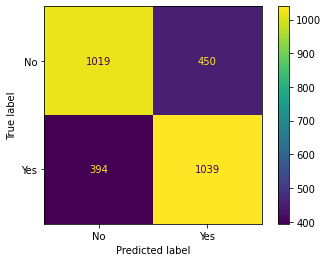

In [42]:
plot_confusion_matrix(clf_gb, testX, testY, values_format = 'd', display_labels = ["No", "Yes"])

In [43]:
y_pred=clf_gb.predict(testX)
print(classification_report(testY, y_pred),'\n')

              precision    recall  f1-score   support

           0       0.72      0.69      0.71      1469
           1       0.70      0.73      0.71      1433

    accuracy                           0.71      2902
   macro avg       0.71      0.71      0.71      2902
weighted avg       0.71      0.71      0.71      2902
 



In [44]:
f1_score(testY,y_pred)

0.7111567419575634